In [1]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC

from kernel_usage_dataset import X,labels_1, labels_2, labels_3

# Experiments with Kernels

Kernels are a powerful technique allowing one to use techniques designed to learn linear models to actually learn non-linear functions. To experiment with them, we provide you with three datasets generated using non linear functions. In these dataset each example is described by a vector $x \in \mathbb{R}^2$ while labels are from the set $\{r, b\}$.

For the sake of making the plots more legible $x$ values have been generated to fill a square grid of points in the region $[0,1] \times [0,1]$. Example descriptions have been loaded into matrix `X`. Matrix `X` is fixed for the three experiments.

Labels have been loaded in the vectors with names `labels_1`, `labels_2`, and `labels_3`.

# Plots of the three datasets

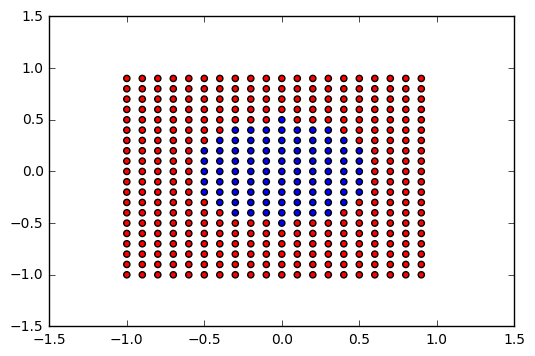

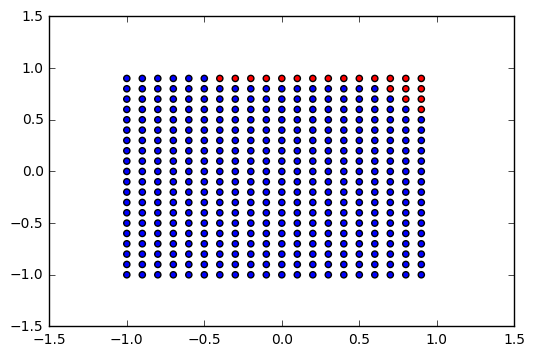

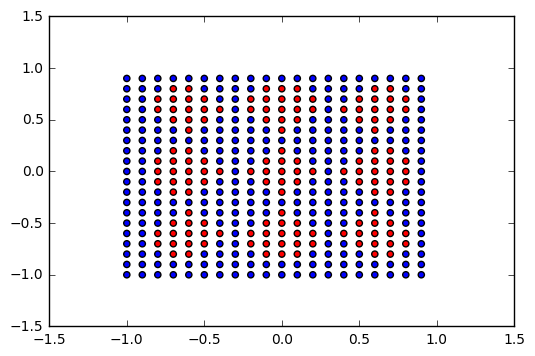

In [2]:
plt.scatter(X[:,0].tolist(),X[:,1].tolist(), c=labels_1, marker='o')
plt.show()
plt.scatter(X[:,0].tolist(),X[:,1].tolist(), c=labels_2, marker='o')
plt.show()
plt.scatter(X[:,0].tolist(),X[:,1].tolist(), c=labels_3, marker='o')
plt.show()

# Exercise

- Define three functions (`kernel_1`, `kernel_2`, and `kernel_3`) so that `kernel_i` implements one of the kernel we introduced in the theory part of the course and is able to learn the dataset associated with `label_i`. 

- Use SVC to learn a classifier for each dataset using the kernels you implemented.

- Plot the predictions of your classifiers to verify whether the support vector machine learnt something useful. Since in this particular excercise we are not interested in how the model generalizes, it is totally fine to classify the examples in the training set. If everything works properly the generated plots should at least resemble the 

### Note 

To work with SVC properly your functions needs to work as follows. 

Given two matrices $X^{(1)}$ and $X^{(2)}$ containing $n$ and $m$ examples, the function returns an $n \times m$ matrix $M$ such that $M_{i,j} = K\left(X^{(1)}_i, X^{(2)}_j\right)$ (where $X^{(k)}_i$ is the i-th example in matrix $X^{(k)}$).

Esempio:

X =
[
x1,
x2,
x3
]

Z =
[
z1,
z2
]

K = 
[
K(x1,z1), K(x1,z2)
K(x2,z1), K(x2,z2)
K(x3,z1), K(x3,z2)
]

### Note 2

See the slides titled "Important Kernels" for a list of possible kernels to use.

### Note 3

Sometimes support vector machines are a little too aggressive in regularising the resulting function. In some of these exercises you might need to experiment with different values of `C` to avoid this problem.

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def test_kernel(X, y, kernel, plot_title = "", C=1):
    clf = SVC(kernel=kernel, C = C)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    plt.scatter(X[:,0].tolist(),X[:,1].tolist(), c=y_pred, marker='o')
    plt.title(plot_title)
    plt.show()
    print "Accuracy: %s " % accuracy_score(y, y_pred)

In [4]:
from functools import partial

def proxy_kernel(X,Y,kernel):
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            gram_matrix[i, j] = kernel(x, y)
    return gram_matrix

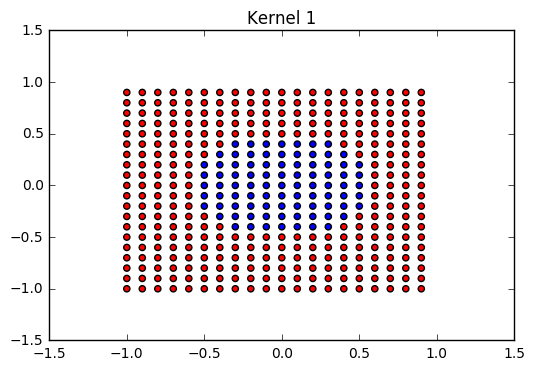

Accuracy: 0.995 


In [51]:
#Gaussian kernel
def kernel_1(X1, X2):
    sigma = 0.5
    return np.exp(-np.sum((X1-X2)**2)/(2*sigma**2))
    
test_kernel(X, labels_1, partial(proxy_kernel, kernel=kernel_1), "Kernel 1")

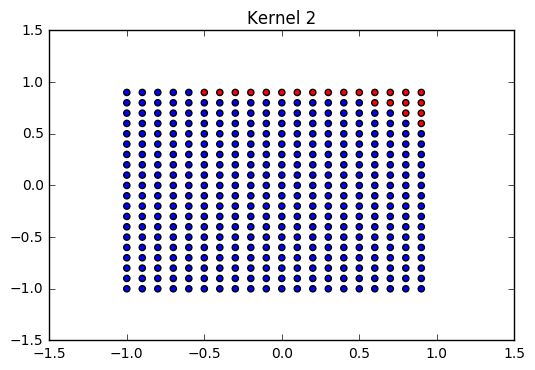

Accuracy: 0.995 


In [11]:
#Polinomial kernel
def kernel_2(X1, X2):
    d = 4
    return np.power(X1.dot(X2) + 1, d);
    
test_kernel(X, labels_2, partial(proxy_kernel, kernel=kernel_2), "Kernel 2")

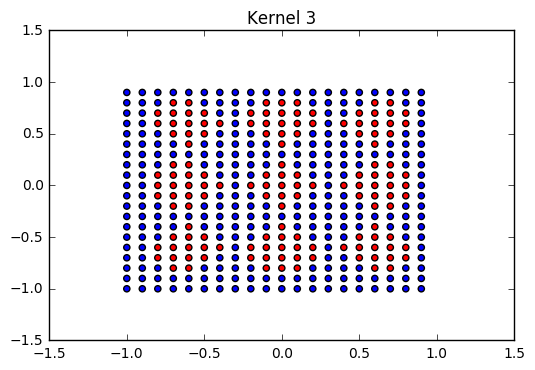

Accuracy: 1.0 


In [9]:
def kernel_3(X1, X2):
    sigma = 0.01
    return np.exp(-np.sum((X1-X2)**2)/(2*sigma**2))

test_kernel(X, labels_3, partial(proxy_kernel, kernel=kernel_3), "Kernel 3")